<a href="https://colab.research.google.com/github/KHARBOUCHEBilal/JEE_Simple_Project/blob/master/TP_CNN_Chiffres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reconnaissance de chiffres avec CNN**

# **Charger et préparer les données**

1. Télécharger la base de données mnist depuis Keras et vériﬁer le format des données.


In [52]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test)=mnist.load_data()

In [53]:
print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

trainset: (60000, 28, 28)
testset: (10000, 28, 28)


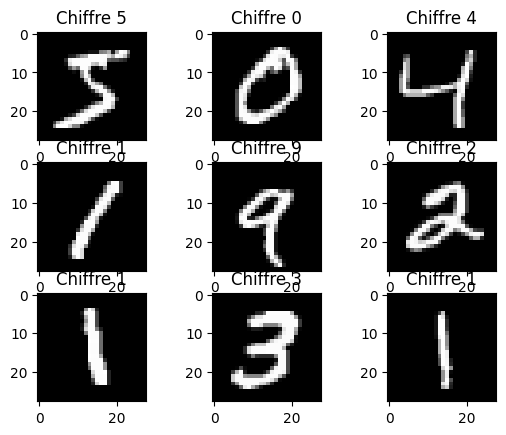

In [54]:
import matplotlib.pyplot as plt
# visualisation de quelques images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Chiffre %d'% y_train[i])

2. Redimensionner les données : pour représenter chaque image sous forme d'un vecteur.

In [55]:
import numpy as np


In [56]:
M =X_train.shape[0]
N= X_test.shape[0]
X_train_redim = np.reshape(X_train,(M,28,28,1))
X_test_redim  = np.reshape(X_test,(N,28,28,1))


3. Normaliser les données : pour avoir des valeurs de pixels compris entre 0 et 1.

In [57]:
# Normalisation des données
X_train_redim = X_train_redim.astype('float') / 255
X_test_redim  = X_test_redim.astype('float') / 255

4. Encodez les données de sorties (transformer les chiffres de sortie en données catégorielles).

In [58]:
from tensorflow.keras.utils import to_categorical
nb_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train,nb_classes)
y_test_categorical = to_categorical(y_test,nb_classes)

# **Déﬁnir le modèle**

1. Créer une fonction qui déﬁnit, compile et retourne un modèle selon l'architecture proposer.

In [60]:
#=============    Architecture  TP 1   ==============
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.regularizers import l2

# model = Sequential()
# model.add(Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(28, 28, 1)))
# model.add(Conv2D(16, (3, 3),padding="same", activation='relu'))
# model.add(Flatten())
# model.add(Dense(10, activation='softmax'))
#=============    Architecture  TP 2   ==============
model = Sequential()
model.add(Conv2D(32, (5, 5),padding="same", activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3),padding="same", activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128, activation='softmax'))
model.add(Dense(units=64, activation='softmax'))
model.add(Dense(10, activation='softmax'))

In [61]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 16)          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)              

# **Compiler le modéle**

In [62]:
model.compile(loss='categorical_crossentropy',optimizer ='adam', metrics = ['accuracy'])

# **Évaluer le modèle**

1. Entrainer le modèle sur les données d'entrainement et de test.



In [63]:
historique = model.fit(X_train_redim , y_train_categorical , validation_data=(X_test_redim , y_test_categorical) ,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 76s 40ms/step - loss: 1.6835 - accuracy: 0.5658 - val_loss: 0.9223 - val_accuracy: 0.6860
Epoch 2/4
1875/1875 [==============================] - 72s 38ms/step - loss: 0.7552 - accuracy: 0.6908 - val_loss: 0.6410 - val_accuracy: 0.7002
Epoch 3/4
1875/1875 [==============================] - 71s 38ms/step - loss: 0.6158 - accuracy: 0.7012 - val_loss: 0.5582 - val_accuracy: 0.7091
Epoch 4/4
1875/1875 [==============================] - 74s 39ms/step - loss: 0.5077 - accuracy: 0.7738 - val_loss: 0.3994 - val_accuracy: 0.8081


2. Calculer l'erreur et la précision sur les données d'entraînement et de test.


In [64]:
loss,accuracy=model.evaluate(X_train_redim,y_train_categorical)
print("L'Erreur sur les données d'apprentissage: %.2f%%" %(loss*100))
print("Précision sur les données d'apprentissage: %.2f%%" %(accuracy*100))
resultat=model.evaluate(X_test_redim,y_test_categorical)
print("L'Erreur sur les données de test : %2.f%% "%(resultat[0]*100))
print("Précision sur les données de test : %2.f%% "%(resultat[1]*100))

1875/1875 [==============================] - 23s 13ms/step - loss: 0.4008 - accuracy: 0.8108
L'Erreur sur les données d'apprentissage: 40.08%
Précision sur les données d'apprentissage: 81.08%
313/313 [==============================] - 3s 11ms/step - loss: 0.3994 - accuracy: 0.8081
L'Erreur sur les données de test : 40% 
Précision sur les données de test : 81% 


3. Tracer les courbes de précision et de loss.

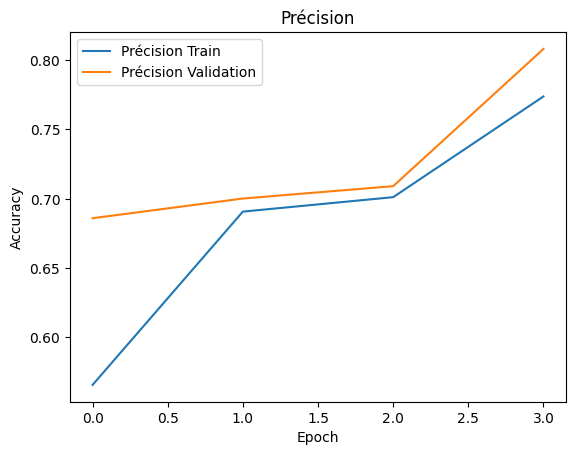

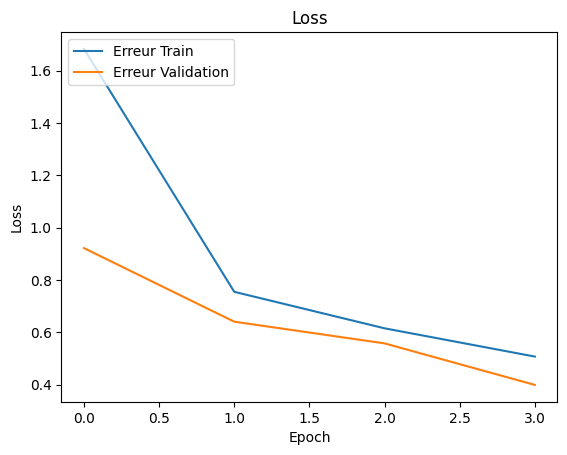

In [65]:
# import matplotlib.pyplot as plt
# def show_history(train_acc_loss,val_acc_loss):
#   plt.plot(historique.hisotry[train_acc_loss])
#   plt.plot(historique.history[val_acc_loss])
#   plt.title("Train History")
#   plt.ylabel('Accuracy')
#   plt.xlabel('Epoch')
#   plt.legned(['train', 'test'], loc='upper left')
#   plt.show()
# show_history('accuracy','val_accuracy')
# show_history('loss','val_loss')
import matplotlib.pyplot as plt
plt.plot(historique.history['accuracy'])
plt.plot(historique.history['val_accuracy'])
plt.title('Précision')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Précision Train','Précision Validation'],loc='upper left')
plt.show()
plt.plot(historique.history['loss'])
plt.plot(historique.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Erreur Train','Erreur Validation'],loc='upper left')
plt.show()

4. Pour une donnée particulière, comparer le chiffre prédit et le chiffre attendu.

313/313 [==============================] - 5s 16ms/step
3
La sortie: [6.5674278e-04 1.6053774e-03 3.1982358e-03 4.7283590e-01 6.9012522e-04
 4.0804982e-01 1.8070135e-03 4.5473111e-04 1.0487309e-01 5.8290632e-03]


Text(0.5, 1.0, 'Attendu:5, Prédit:3,(47.28%)')

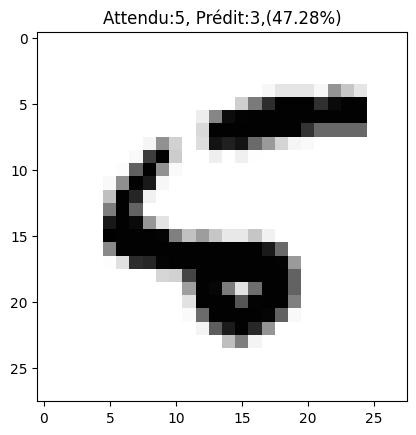

In [66]:
import numpy as np
y_predict=model.predict(X_test_redim)
i=8
chiffre_predit=np.argmax(y_predict[i])
print(chiffre_predit)
print('La sortie:',y_predict[i])
plt.imshow(X_test[i],cmap='Greys')
plt.title('Attendu:%d, Prédit:%d,(%.2f%%)'%(y_test[i],chiffre_predit,y_predict[i][chiffre_predit]*100))